Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


31/31 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0596
Epoch 2/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0119
Epoch 3/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0070
Epoch 4/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0057
Epoch 5/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0067
Epoch 6/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0055
Epoch 7/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0048
Epoch 8/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0039
Epoch 9/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0043
Epoch 10/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0029
Epoch 11/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0031
Epoch 12/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0028
Epoch 13/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0022
Epoch 14/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0021
Epoch 15/20
31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0021
Epoch 16/20
31/31 ━━━━━━━━━━━━

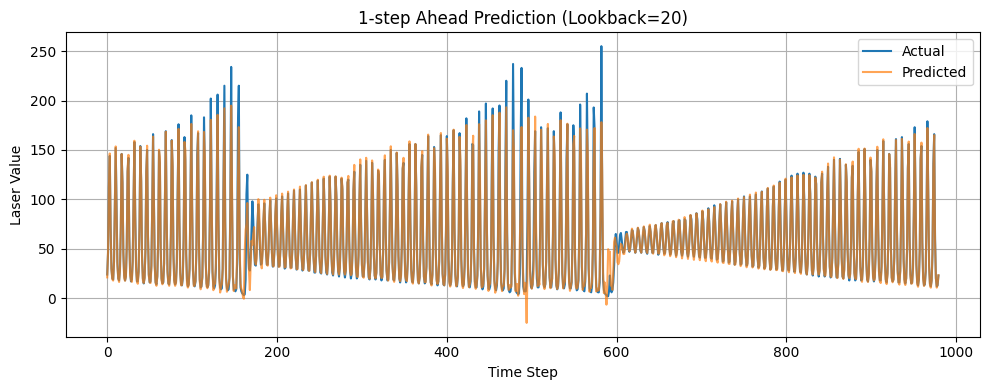

In [10]:
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import scipy.io

# Read mat
mat = scipy.io.loadmat("Xtrain.mat")
xtrain = mat['Xtrain'].squeeze()

# Scale data to [0, 1]
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(xtrain.reshape(-1, 1)).flatten()
scaled = scaler.fit_transform(xtrain.reshape(-1, 1)).flatten()

# Data pairs
lookback = 20

def create_dataset(series, lookback):
    X, y = [], []
    for i in range(len(series) - lookback):
        X.append(series[i:i + lookback])
        y.append(series[i + lookback])
    # X = np.array(X).reshape(-1, lookback, 1)
    # y = np.array
    return np.array(X).reshape(-1, lookback, 1), np.array(y)
X, y = create_dataset(scaled_data, lookback)

# CNN model
model = tf.keras.Sequential([
    tf.keras.layers.Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(lookback, 1)),
    tf.keras.layers.MaxPooling1D(pool_size=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(50, activation='relu'),
    tf.keras.layers.Dense(1)  # predict one step ahead
])

model.compile(optimizer='adam', loss='mse')
model.fit(X, y, epochs=20, batch_size=32, verbose=1)

# Rescaling
pred = model.predict(X, verbose=0).reshape(-1, 1)
y_true = y.reshape(-1, 1)

pred_inv = scaler.inverse_transform(pred)
y_inv   = scaler.inverse_transform(y_true)

# MSE and MAE
mse = mean_squared_error(y_inv, pred_inv)
mae = mean_absolute_error(y_inv, pred_inv)
print(f"Lookback: {lookback} — MSE: {mse:.4f}, MAE: {mae:.4f}")

#lookback_vals = [5, 10, 20, 30, 50]
#metrics = {lookback: (mse, mae)}
#lookbacks = sorted(metrics.keys())
#mses = [metrics[lb][0] for lb in lookbacks]

# Prediction
input_ord = scaled[-lookback:].tolist()  # lookback values in a list
next_200_preds = []  # list for the predictions
for _ in range(200):  # loop to predict the next 200 data points
    a_input = np.array(input_ord[-lookback:]).reshape(1, lookback, 1)  # input for prediction
    pred = model.predict(a_input, verbose=0)[0, 0]
    next_200_preds.append(pred)
    input_ord.append(pred)

pred_inverse = scaler.inverse_transform(np.array(next_200_preds).reshape(-1, 1))  # back to original scale
print(f"\nRecursively predicted 200 data points of lookback {lookback}:")
print(pred_inverse.flatten())

#######################

# Prediction vs first
plt.figure(figsize=(10, 4))
plt.plot(y_inv, label='Actual')
plt.plot(pred_inv, label='Predicted', alpha=0.7)
plt.title(f'1-step Ahead Prediction (Lookback={lookback})')
plt.xlabel('Time Step')
plt.ylabel('Laser Value')
plt.legend()
plt.grid(True)
plt.tight_layout()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LB=5 → MSE=358.9256, MAE=8.7620


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LB=10 → MSE=65.3837, MAE=3.9962


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LB=20 → MSE=100.9159, MAE=5.8074


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LB=30 → MSE=110.1504, MAE=5.5334


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


LB=50 → MSE=132.8322, MAE=7.0453


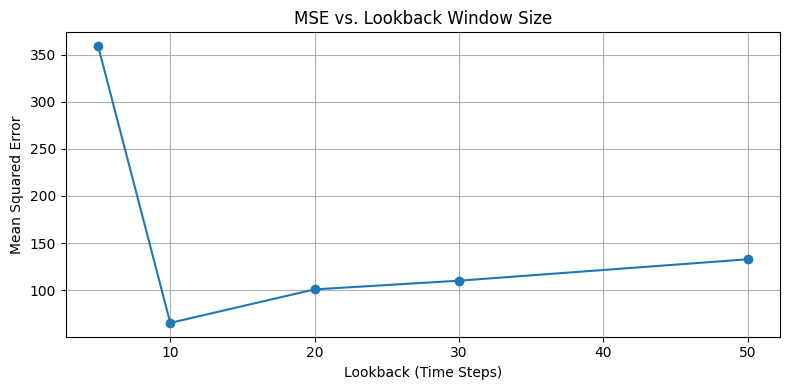

In [11]:
###This code is only for porpuse of best time for lookback (is the same as our main code only differs on its only porpuse
#is to help  choose best lookout)

import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import scipy.io

mat     = scipy.io.loadmat("Xtrain.mat")
xtrain  = mat['Xtrain'].squeeze()
scaler  = MinMaxScaler()
scaled  = scaler.fit_transform(xtrain.reshape(-1,1)).flatten()

def create_dataset(series, lb):
    X, y = [], []
    for i in range(len(series)-lb):
        X.append(series[i:i+lb])
        y.append(series[i+lb])
    return np.array(X).reshape(-1, lb, 1), np.array(y)

lookback_vals = [5, 10, 20, 30, 50]
metrics       = {}

for lb in lookback_vals:
    X, y = create_dataset(scaled, lb)
    model = tf.keras.Sequential([
        tf.keras.layers.Conv1D(32, 3, activation='relu', input_shape=(lb,1)),
        tf.keras.layers.MaxPooling1D(2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dense(50, activation='relu'),
        tf.keras.layers.Dense(1),
    ])
    model.compile('adam', 'mse')
    model.fit(X, y, epochs=20, batch_size=32, verbose=0)
    pred    = model.predict(X, verbose=0).reshape(-1,1)
    y_true  = y.reshape(-1,1)
    pred_inv = scaler.inverse_transform(pred)
    y_inv    = scaler.inverse_transform(y_true)
    mse = mean_squared_error(y_inv, pred_inv)
    mae = mean_absolute_error(y_inv, pred_inv)
    metrics[lb] = (mse, mae)
    print(f"LB={lb} → MSE={mse:.4f}, MAE={mae:.4f}")

# MSE vs lookback
lookbacks = sorted(metrics.keys())
mses      = [metrics[lb][0] for lb in lookbacks]

plt.figure(figsize=(8,4))
plt.plot(lookbacks, mses, marker='o')
plt.title('MSE vs. Lookback Window Size')
plt.xlabel('Lookback (Time Steps)')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.tight_layout()
plt.show()